# Inspiser en word2vec-modell

Installer gensim og test

In [105]:
from gensim.models import KeyedVectors
from gensim import models
from IPython.display import Markdown
import pandas as pd

Last ned modellen og ta den inn i notebooken

In [106]:
model_file = 'poems_wergeland.model' # eller annet filnavn - pass på sti

model = KeyedVectors.load(model_file)    #load_word2vec_format(model_file, binary=True)
d = model.wv
del model

Test med most_similar for forskjellige ord for evaluering.

In [107]:
d.get_vector('helse')

KeyError: "Key 'helse' not present"

In [108]:
def check(word, list_of_words):
    def test(x,y):
        try:
            return d.rank(x,y)
        except:
            return 1000000
    res = {w: test(word, w) for w in list_of_words}
    return pd.DataFrame.from_dict(res, orient='index', columns=[word]).sort_values(by=word)

In [109]:
check('kne', "kne hofte skulder".split())

,kne
kne,1000000
hofte,1000000
skulder,1000000


In [110]:
d.most_similar('han', topn=60)

[('hun', 0.9896023869514465),
 ('man', 0.9724106192588806),
 ('vi', 0.9568732976913452),
 ('Gud', 0.9559341073036194),
 ('Jorden', 0.9552971124649048),
 ('Hun', 0.9533659815788269),
 ('En', 0.9521682262420654),
 ('Himlen', 0.9517403244972229),
 ('det', 0.951693058013916),
 ('nok', 0.951618492603302),
 ('den', 0.9503583312034607),
 ('Alt', 0.9497703909873962),
 ('det,', 0.949138879776001),
 ('Og', 0.9489814043045044),
 ('stort', 0.9483044147491455),
 ('endt.', 0.9475139379501343),
 ('Den', 0.9468966126441956),
 ('Du', 0.946804404258728),
 ('være', 0.9463289976119995),
 ('reist', 0.9462607502937317),
 ('Jeg', 0.9452782273292542),
 ('blive', 0.944227397441864),
 ('slæbe', 0.9434854984283447),
 ('Han', 0.9429283738136292),
 ('Sorg', 0.9416373372077942),
 ('dog', 0.9416176676750183),
 ('denne', 0.9409589767456055),
 ('dem', 0.9404066801071167),
 ('Maaneskinnet', 0.9400774240493774),
 ('den,', 0.9395036697387695),
 ('endt,', 0.9386159181594849),
 ('men', 0.9383965730667114),
 ('hvis', 0.9373

In [114]:
T = ""
for x in "Himlen Havet Sjøen Øine Haand Aand".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### Himlen 
 Jorden, denne, Den, Alt, Blod, reist, Hjertet, buden, Sorg, Hende,

### Havet 
 venlig, Læben, Solen, midt, Bølgen, Smiil, Røg, hen, Slag, Stormen

### Sjøen 
 Maanen, Kong, Nattens, fagre, himmelske, ømme, springe, Øre, Carl, Øiet

### Øine 
 mørke, sig,, tusinde, medens, Konge, Livets, brød, Sol,, dybe, fine

### Haand 
 Arm, Dag, Jord, al, Graad, Aand, første, fast, Ham,, lidet

### Aand 
 liden, Dag, Haand, Arm, Blik, første, hele, ind, hvid, Sol



In [100]:
T = ""
for x in "prioritering prioriteringer ressurs ressursen ressurser legemidler legemiddel alvorlighet".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### prioritering 
 Vedlegg, Kapittel, Piller,, politikk, legemiddelområdet", "Prinsipper, 1997:, 7, NOU, 3

### prioriteringer 
 tilsvarende, frem, Et, norske, enkelt, arbeid, viktigste, utenfor, fire, innebærer

### ressurs 
### ressursen 
### ressurser 
 dette, større, f.eks., mer, myndighetene, langt, krav, ta, brukes, imidlertid

### legemidler 
 om, kunne, gjelder, til, når, bruke, de, ytes, opptak, legemiddel

### legemiddel 
 kunne, vil, ha, bør, når, slik, Det, viktig, om, bruke

### alvorlighet 
 innenfor, utenfor, medisinske, egen, Med, ligger, endringer, herunder, sykdom,, pasientens



In [54]:
T = ""
for x in "is".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### is 
 it, not, my, so, that, you, more, How, your, are



In [55]:
T = ""
for x in "vitenskap samfunnsvitenskap sosiologi sosialantropologi".split():
    try:
        text = f"### {x} \n {', '.join([x[0] for x in d.most_similar(x, topn=10)])}\n\n"
    except:
        text = f"### {x} \n"
    T += text
    
Markdown(T)
    

### vitenskap 
 filosofi, etikk, vitenskapen, fysikk, naturvitenskap, biologi, kunst, logikk, tenkning, ideologi

### samfunnsvitenskap 
 humaniora, samfunnsmedisin, helsefag, samfunnsfag, sosialantropologi, UiO, geriatri, Nordisk, skriftserie, sykepleievitenskap

### sosiologi 
 sosialantropologi, psykologi, statsvitenskap, samfunnsmedisin, sosialmedisin, antropologi, pedagogikk, biokjemi, informatikk, samfunnsvitenskap

### sosialantropologi 
 sykepleievitenskap, statsvitenskap, sosiologi, samfunnsvitenskap, samfunnsmedisin, sosialpsykologi, samfunnsfag, sosialmedisin, Psykologi, helsefag



# Make graph

In [56]:
import pandas as pd
import dhlab.graph_networkx_louvain as gnl
import networkx as nx

In [57]:
[x[0] for x in d.most_similar('Ellen', topn=30)]

['Tove',
 'Bjørn',
 'Elisabeth',
 'Randi',
 'Anne',
 'Trine',
 'Knut',
 'Arne',
 'Ingrid',
 'Karin',
 'Tor',
 'Tore',
 'Lars',
 'Odd',
 'Marie',
 'Nils',
 'Jens',
 'Einar',
 'Rune',
 'Berit',
 'Erik',
 'Inger',
 'Hilde',
 'Lisbeth',
 'Olsen',
 'Bente',
 'Berg',
 'Kristian',
 'Geir',
 'Marit']

In [58]:
def make_edges(w, topn=20, visited=None, model = d, level = 0):
    edges = []
    if w not in visited:
        visited.append(w)
        try:
            gdata =  model.most_similar(w, topn=topn)
            edges += [(w, g[0], g[1]) for g in gdata]
            #print(visited)
            if level > 0:
                for g in gdata:
                    l = level - 1
                    edges += make_edges(g[0], topn=topn, visited = visited, level=l)
                    #print(l,edge)
        except:
            pass
            #print("problem", w)
    return edges

def graf(w, model = d, top = 20):
    edges = make_edges(w, topn = top, visited=[], model=model,level = 1)
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    return G

In [59]:
G = graf('pålegg',model=d, top=15)

gnl.show_communities(G)

saft-pulver :  saft, pulver, juice, smør, olivenolje, kjeks, sirup, timian, sjokolade, majones, plast, rå, rødvin, kamille

kylling-grøt :  kylling, grøt, lettmelk, tilbehør, pålegg, honning, loff, reker, salat, hjemmelaget, stekt, kokt, havregrøt, skummet, salater, skummetmelk, eddik, pizza, pynt, dessert, torsk

middagsmat-hvitost :  middagsmat, hvitost, Flatbrød, grovbrød, kornblanding, surmelk, kaviar, matolje, bakverk, middagsretter, Frokost, sukret, kveite

fermenterte-kefir :  fermenterte, kefir, tofu, fryste, hvetekim, frokostblandinger, meierismør, soyabønner

ris-pasta :  ris, pasta, ost, krydder, brød, yoghurt, fløte, havregryn, supper, spinat, knekkebrød, bønner, makrell, mel, poteter, jordbær, nøtter, leverpostei, mais, hvitløk, sild, kaker, sauser, bær

syltetøy-skinke :  syltetøy, skinke, rømme, rapsolje, brunost, soyasaus, brokkoli, naturell, tomat, rosiner, cheese, gulrøtter, tunfisk, cottage



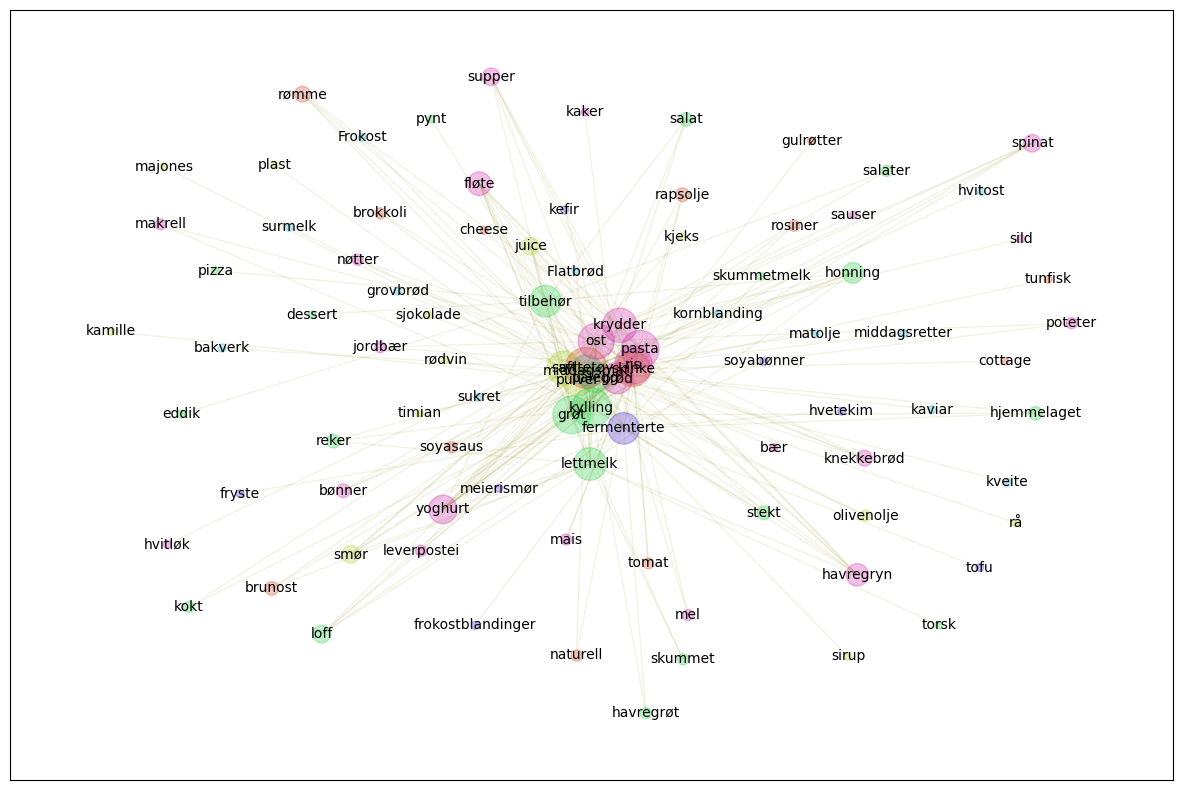

In [60]:
gnl.show_graph(G, spread=0.01)

In [64]:
from collections import Counter

In [65]:
def show_centralities(G, size=10):
    cols = [Counter(nx.betweenness_centrality(G)).most_common(size),
            Counter(nx.degree_centrality(G)).most_common(size),
            Counter(nx.in_degree_centrality(G)).most_common(size),
            Counter(nx.out_degree_centrality(G)).most_common(size)
           ]
    names = ["Betweennes", "Degree", "Indegree", "Outdegree"]
    res = zip(names, cols)
    cents = pd.concat(map(lambda x: pd.DataFrame(x[1], columns =['index', x[0]]).set_index('index'), res), axis = 1)
    return cents

In [66]:
G = graf('is', model=d,top=20)
(show_centralities(G, 20).fillna(0)
    .sort_values(by=['Degree','Indegree','Betweennes','Outdegree',], ascending=False)
    .style
    .background_gradient(axis = 1))

,Betweennes,Degree,Indegree,Outdegree
index,,,,
your,0.011359,0.336283,0.159292,0.176991
what,0.005715,0.327434,0.150442,0.176991
but,0.005105,0.327434,0.150442,0.176991
How,0.009608,0.318584,0.141593,0.176991
my,0.005732,0.318584,0.141593,0.176991
we,0.009383,0.300885,0.123894,0.176991
are,0.008059,0.292035,0.115044,0.176991
can,0.003486,0.292035,0.115044,0.176991
not,0.002427,0.292035,0.115044,0.176991


In [56]:
a = "Han drepte henne".split()
b = "Ola voldtok Marit ".split()
c = "han elsket henne".split()

In [ ]:
import numpy as np

In [57]:
m = d

In [58]:
avec = np.add.reduce([m[x] for x in a if x in m])

In [59]:
bvec = np.add.reduce([m[x] for x in b])

In [60]:
cvec = np.add.reduce([m[x] for x in c])

In [61]:
from scipy.spatial.distance import cosine

In [62]:
cosine(bvec, cvec)

0.4940808415412903

In [63]:
cosine(avec, bvec)

0.4644389748573303

In [64]:
cosine(avec, cvec)

0.06902867555618286

In [502]:
d['konge']

array([-0.09927908,  0.27863783,  0.08207181,  0.05657858, -0.13962978,
       -0.1424493 ,  0.06331921,  0.30286202, -0.17559525, -0.08047769,
        0.00869436, -0.27819964, -0.08409055, -0.01263583,  0.05935835,
       -0.01269752,  0.20533673, -0.2027495 ,  0.00431319, -0.34668076,
        0.10838543,  0.09876537,  0.17007446, -0.03127407,  0.01388995,
        0.07690159, -0.07100473,  0.00100106, -0.16169405,  0.14132574,
        0.29360393, -0.0108307 ,  0.15504372, -0.28619918, -0.02386783,
        0.12967385,  0.07731283, -0.26178336, -0.11414833, -0.24678314,
       -0.0167435 , -0.07253201, -0.14655782, -0.02129233,  0.10917688,
        0.02041457, -0.04210058,  0.08376808,  0.00634978,  0.20020379,
        0.04681044, -0.14323482, -0.09280784, -0.08289227, -0.17467651,
        0.01492229,  0.08727186, -0.0657694 , -0.25182226, -0.07195269,
        0.07373559,  0.08266725,  0.24257687, -0.03088325, -0.3018921 ,
        0.19917484,  0.14292385,  0.22228958, -0.28303838,  0.07

In [317]:
m['dronning']

array([-2.0357296 , -1.4922447 ,  1.9984303 ,  2.509681  ,  0.4678565 ,
       -0.5607563 , -0.68748707, -1.6449172 , -2.849245  , -2.738875  ,
       -0.6869653 , -1.3970499 , -3.6125734 ,  1.221389  , -1.6714805 ,
       -2.4626887 ,  0.9088261 , -0.7730676 , -1.672319  , -0.1978911 ,
       -2.8794448 ,  1.3136307 ,  3.7261515 ,  2.392581  ,  0.85708606,
        0.96473825,  1.7944518 , -1.3518511 , -4.087831  , -2.3581512 ,
       -1.5161412 , -0.9028114 , -2.1542652 ,  1.4666175 , -0.06540404,
        2.6612759 , -0.2565892 , -3.331793  , -0.28736132,  2.047924  ,
       -0.03520462,  0.6989206 , -0.40027627,  3.4016159 ,  0.3811961 ,
       -3.9728603 ,  1.3520294 ,  2.1297576 , -1.1687332 ,  1.4254082 ],
      dtype=float32)

In [336]:
kombo = (m['konge'] - m['mann']) + m['kvinne']

In [337]:
cosine(m['konge'], m['dronning'])

0.22376716136932373

In [338]:
cosine(kombo, m['dronning'])

0.23343390226364136